In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = 999
data_path = "Train_churn.csv"
data = pd.read_csv(data_path) #Reads CSV file into a dataframe

In [4]:
data = data.set_index(['ID'])
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
data['Gender'] = label_encoder.fit_transform(data['Gender']) #Encodes Labels into Binary Data

In [5]:
data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
ID,,,,,,,,,,
84e2fcc9,36,0,5L - 10L,563266.44,4,0,1,0,Average,1
57fea15e,53,0,Less than 5L,875572.11,2,1,1,1,Poor,0
8df34ef3,35,0,More than 15L,701607.06,2,1,2,0,Poor,0
c5c0788b,43,0,More than 15L,1393922.16,0,1,2,1,Poor,1
951d69c4,39,0,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...
a8216afd,61,1,5L - 10L,1354526.19,4,1,2,1,Poor,1
153a306b,42,0,5L - 10L,596286.54,3,1,2,1,Average,0
d4075a95,29,1,Less than 5L,979298.19,2,0,2,0,Poor,0


In [6]:
#Encoding Credit Category with Poor as -1, Average as 0 and Good as 1
a = [] 
for cc in data.Credit_Category:
    if(cc[0]=='P'):
        a.append(-1)
    elif(cc[0]=='A'):
        a.append(0)
    else:
        a.append(1)

In [7]:
data.Credit_Category = a

In [8]:
#Encoding Income with Less than 5L as -1, Average as 0 and Good as 1
a = []
for cc in data.Income:
    if(cc[0]=='L'):
        a.append(-1)
    elif(cc[0]=='5'):
        a.append(0)
    else:
        a.append(1)

In [9]:
data.Income = a

In [10]:
#Encoding Credit Category with Less than 5L as , Average as 0 and Good as 1
a = [] 
for i in data.Product_Holdings:
    if(i[0]=='3'):
        a.append(3)
    else:
        a.append(int(i))
data.Product_Holdings=a

In [11]:
data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
ID,,,,,,,,,,
84e2fcc9,36,0,0,563266.44,4,0,1,0,0,1
57fea15e,53,0,-1,875572.11,2,1,1,1,-1,0
8df34ef3,35,0,1,701607.06,2,1,2,0,-1,0
c5c0788b,43,0,1,1393922.16,0,1,2,1,-1,1
951d69c4,39,0,1,893146.23,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
a8216afd,61,1,0,1354526.19,4,1,2,1,-1,1
153a306b,42,0,0,596286.54,3,1,2,1,0,0
d4075a95,29,1,-1,979298.19,2,0,2,0,-1,0


In [12]:
data.groupby(by=['Is_Churn']).Age.count()  #data is heaily biased towards is_churned = 0

Is_Churn
0    5113
1    1537
Name: Age, dtype: int64

In [13]:
#Apllying SMOTE Algorithm to account for data imablance or covariate shift

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Is_Churn'],axis=1), data.Is_Churn , test_size=0.1, random_state=0)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [14]:
y_train.sum()/len(y_train)  #ratio of is_churned values = 0.5

0.5

In [15]:
#Pre processing data using a standard scaler
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train[['Balance','Age']] = ss_train.fit_transform(X_train[['Balance','Age']])

ss_test = StandardScaler()
X_test[['Balance','Age']] = ss_test.fit_transform(X_test[['Balance','Age']])

In [16]:
X_train

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,2.430586,0,-1,-1.379546,3,1,1,1,1
1,2.109905,1,-1,0.149042,1,1,1,1,-1
2,0.934074,0,1,1.736566,3,1,1,1,1
3,0.185818,1,-1,0.241048,4,0,1,1,1
4,-0.134863,1,0,1.315438,2,0,1,1,-1
...,...,...,...,...,...,...,...,...,...
9217,0.185818,1,0,1.255675,1,0,1,1,-1
9218,-0.241757,1,-1,0.679046,3,0,1,1,0
9219,-0.669332,0,1,-0.127511,1,0,2,0,0
9220,0.185818,0,0,0.690599,4,0,1,0,-1


In [17]:
models = {}
#Initialises different models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from lightgbm import LGBMClassifier as lgb
models['LGBoost'] = lgb()

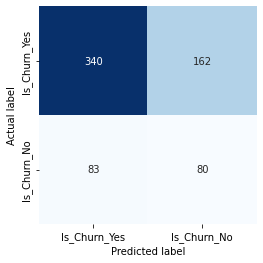

/Users/raghavaggarwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


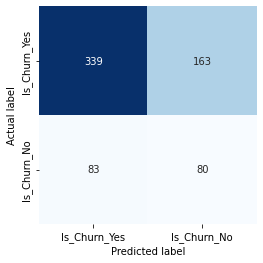

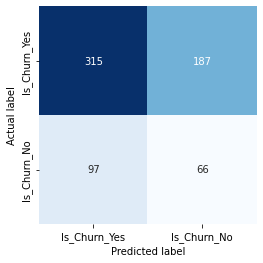

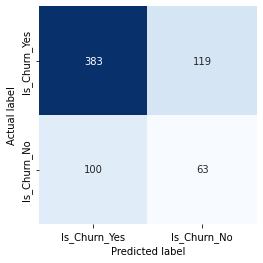

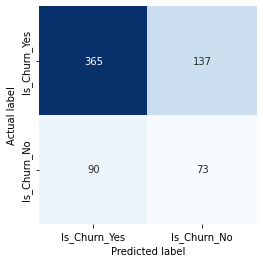

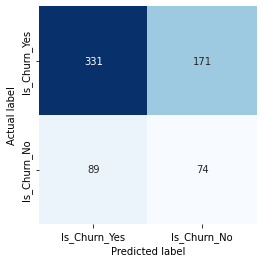

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

accuracy, precision, recall,roc = {}, {}, {}, {}
ensemble = np.zeros(y_test.shape)

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    ensemble += predictions
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    roc[key] = roc_auc_score(predictions, y_test)

    mat = confusion_matrix(y_test, predictions)
    labels = ['Is_Churn_Yes', 'Is_Churn_No']

    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

In [ ]:
predictions = np.round(ensemble/7)
print(accuracy_score(predictions, y_test),
      precision_score(predictions, y_test),
      recall_score(predictions, y_test),
      roc_auc_score(predictions, y_test))

In [ ]:
#Evaluates models on various metrics
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['Roc'] = roc.values()
df_model

In [ ]:
def customLoss(y_true, y_pred):
  y_pred-=float(y_true)
  y_pred*=1000
  y_pred = abs(y_pred)
  return y_pred

In [129]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=X_train[0].size))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(1, activation='tanh')) 
model.compile(loss=customLoss, optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1280      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [131]:
y_predicted = model.predict(X_test) > 0.5